# SVM

Autor: Jarosław Ciołek-Żelechowski, 218386

# Imports

In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

# Data

In [4]:
labels = pd.read_csv('data.csv')
labels.head()

,path,value
0,/home/torak28/Desktop/Studia/MGU/Projekt/PS-Ba...,0
1,/home/torak28/Desktop/Studia/MGU/Projekt/PS-Ba...,1
2,/home/torak28/Desktop/Studia/MGU/Projekt/PS-Ba...,1
3,/home/torak28/Desktop/Studia/MGU/Projekt/PS-Ba...,1
4,/home/torak28/Desktop/Studia/MGU/Projekt/PS-Ba...,1


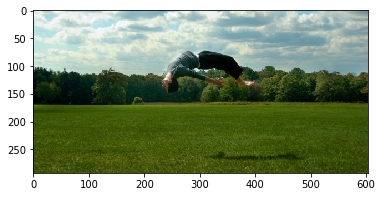

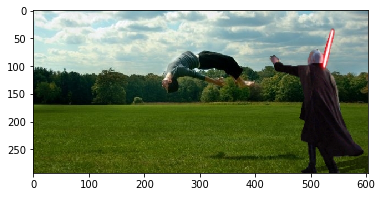

In [5]:
def get_image(path):
    img = Image.open(path)
    return np.array(img)


org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row))
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row))
plt.show()

# Grayscale + scale image to 224 x 224

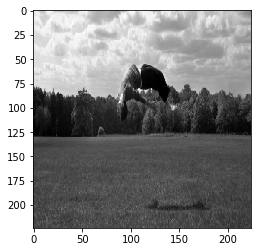

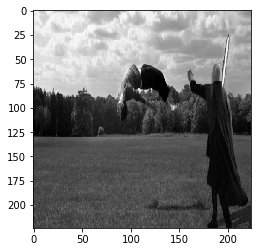

(224, 224)


In [15]:
def get_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    img = rgb2grey(img)
    return img

org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row), cmap='gray')
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row), cmap='gray')
plt.show()

print(get_image(org_row).shape)

# HOG - Histogram of oriented gradients

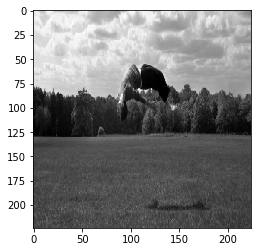

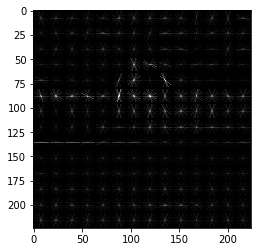

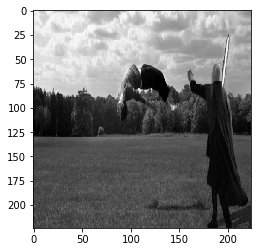

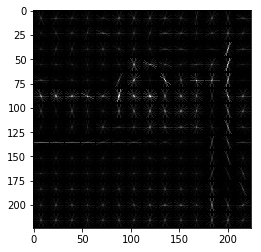

[0.17845964 0.09957328 0.07765432 ... 0.04240799 0.03904868 0.05509568]


In [21]:
org_row = labels[labels.value == 0].path[0]
img = get_image(org_row)
plt.imshow(img, cmap='gray')
plt.show()


hog_features, hog_image = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16,16))
plt.imshow(hog_image, cmap='gray')
plt.show()

ps_row = labels[labels.value == 1].path[1]
img = get_image(ps_row)
plt.imshow(img, cmap='gray')
plt.show()


hog_features, hog_image = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16,16))
plt.imshow(hog_image, cmap='gray')
plt.show()

print(hog_features)

# Create image features and flatten to a row

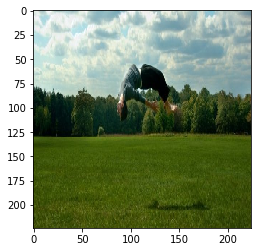

[221 228 220 ...  59  71   5]


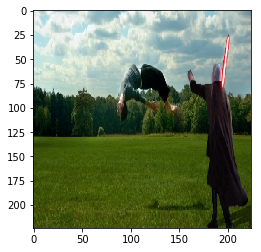

[221 228 220 ...  33  41   0]


In [25]:
def get_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    return img

def create_features(img):
    c_f = img.flatten()
    g_i = rgb2grey(img)
    h_f = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # zespolenie hog + kolor
    flat_features = np.hstack(c_f)
    return flat_features
    
org_row = labels[labels.value == 0].path[0]
img = get_image(org_row)
plt.imshow(img, cmap='gray')
plt.show()

org_features = create_features(img)
print(org_features)

ps_row = labels[labels.value == 1].path[1]
img = get_image(ps_row)
plt.imshow(img, cmap='gray')
plt.show()

ps_features = create_features(img)
print(ps_features)

In [30]:
import difflib

print(len(org_features))
print(len(ps_features))

diff = difflib.SequenceMatcher(None,org_features, ps_features)
odp = diff.ratio()
print(odp)


150528
150528
0.6939971301020408


# Preprocess all images

In [50]:
def get_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img = np.array(img)
    return img

def create_features(img):
    c_f = img.flatten()
    g_i = rgb2grey(img)
    h_f = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # zespolenie hog + kolor
    flat_features = np.hstack(c_f)
    return flat_features

def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.path[:20]:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix

labels = pd.read_csv('data.csv')
labels.head()
feature_matrix = create_feature_matrix(labels)
print('Done')

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


KeyboardInterrupt: 